In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw=pd.read_csv('housing.csv')
raw.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
raw["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


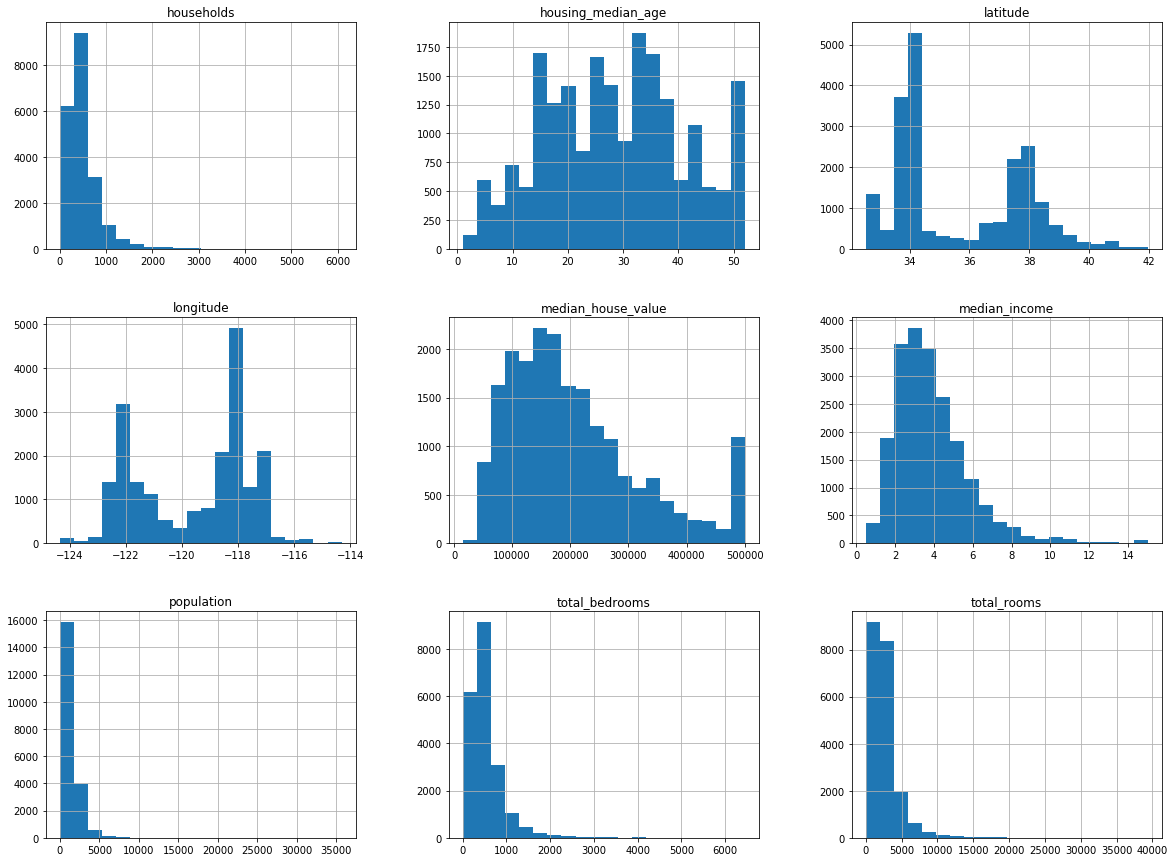

In [5]:
raw.hist(bins=20, figsize=(20, 15))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(raw,test_size=0.3,random_state=20)
print("Train set shape is {0} and Test set shape is {1}".format(train_set.shape, test_set.shape))

Train set shape is (14448, 10) and Test set shape is (6192, 10)


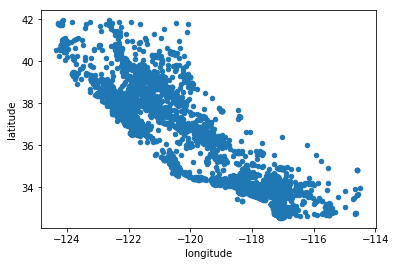

In [7]:
housing =train_set
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

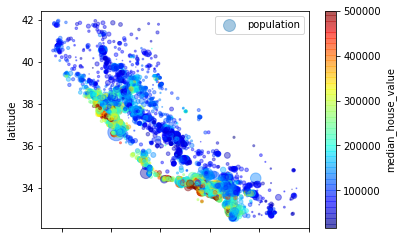

In [8]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing["population"]/100, 
            label='population', c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

In [9]:
from pandas import scatter_matrix

C:\Users\rexdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


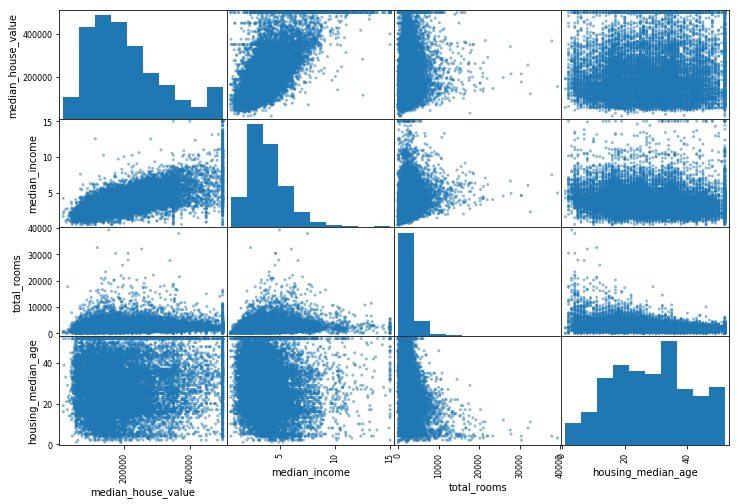

In [10]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [13]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.683432
total_rooms           0.131242
housing_median_age    0.107375
households            0.063257
total_bedrooms        0.048237
population           -0.028215
longitude            -0.044677
latitude             -0.146140
Name: median_house_value, dtype: float64

In [14]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [24]:
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6441,-118.03,34.10,30.0,2773.0,634.0,1376.0,540.0,2.7857,201700.0,INLAND
1455,-121.96,37.95,7.0,3418.0,740.0,1583.0,676.0,3.6133,196100.0,INLAND
78,-122.29,37.81,23.0,1745.0,374.0,1054.0,325.0,0.8026,112500.0,NEAR BAY


In [25]:
housing_num.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6441,-118.03,34.10,30.0,2773.0,634.0,1376.0,540.0,2.7857,201700.0
1455,-121.96,37.95,7.0,3418.0,740.0,1583.0,676.0,3.6133,196100.0
78,-122.29,37.81,23.0,1745.0,374.0,1054.0,325.0,0.8026,112500.0
